# PMBus on the Pynq-ZU
---

## Aim

* This notebook illustrates how to read current drawn, operating voltage, and power consumption of the various power rails.   

## Revision History

* Initial Release

---

## Print power rails values
The Pynq-ZU has support for monitoring on-board power rails using PMBus. PYNQ exposes these rails through the get_rails function that returns a dictionary of all of the rails available to be monitored.

In [1]:
import pynq

rails = pynq.get_rails()

print("{:<15} {:<15} {:<15} {:<15}".format("Rail", "Voltage", "Current", "Power"),'\n','-' * 52)
for value in rails.values():
    print("{:<15} {:<15} {:<15} {:<15}".format(value.name,
                                               value.voltage.value,
                                               value.current.value,
                                               value.power.value))


Rail            Voltage         Current         Power           
 ----------------------------------------------------
2V5             2.503           0.0             0.0            
SYZYGY_3V3      3.296           0.0             0.0            
SYZYGY_VIO      1.203           0.0             0.0            
SYZYGY_5V0      5.0             0.0             0.0            
MGTA            0.914           0.08            0.078125       
INT             0.867           0.5             0.25           
1V2             1.199           0.171           0.1875         
AUX             1.8             0.171           0.28125        
PSDDR_HDMI      1.203           0.328           0.375          
DP_3V3          3.312           0.0             0.0            
3V3             3.296           0.5             1.5            
PSINTLP         0.851           0.281           0.21875        
PSAUX           1.796           0.218           0.375          
PSINTFP         0.843           1.093           0

As can be seen, the keys of the `rails` dictionary are the names of the voltage rails while the values are `Rail` objects which contain three sensors for the voltage, current and power.

## Record and display power values over time
To see how power changes over time, we can use the `DataRecorder` class. For example, monitor power of the `PSINTFP` line every half second while sleeping and performing a dummy loop.

In [2]:
recorder = pynq.DataRecorder(rails['PSINTFP'].power)

In [3]:
import time
with recorder.record(0.5):
    time.sleep(10)
    for _ in range(10000000):
        pass
    time.sleep(10)

The `DataRecorder` exposes the sensor data as a pandas dataframe

In [4]:
recorder.frame

,Mark,PSINTFP_power
2021-02-25 01:52:51.894467,0.0,1.12500
2021-02-25 01:52:52.420726,0.0,1.12500
2021-02-25 01:52:52.953378,0.0,0.90625
2021-02-25 01:52:53.467222,0.0,0.90625
2021-02-25 01:52:54.003281,0.0,0.90625
2021-02-25 01:52:54.514208,0.0,0.90625
2021-02-25 01:52:55.052820,0.0,0.93750
2021-02-25 01:52:55.566396,0.0,0.93750
2021-02-25 01:52:56.101779,0.0,0.96875
2021-02-25 01:52:56.615305,0.0,0.96875


or by plotting the results using matplotlib

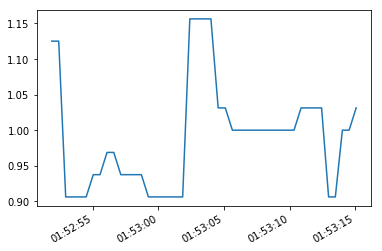

In [5]:
%matplotlib inline
recorder.frame['PSINTFP_power'].plot()

We can get more information by using the `mark` function which will increment the invocation number without having to stop and start the recorder

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8212d4e0>,
      dtype=object)

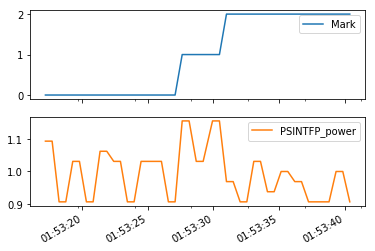

In [6]:
recorder.reset()
with recorder.record(0.5):
    time.sleep(10)
    recorder.mark()
    for _ in range(10000000):
        pass
    recorder.mark()
    time.sleep(10)
    
recorder.frame.plot(subplots=True)

This clearly shows the power spike when the for loop starts running.

Copyright (C) 2021 Xilinx, Inc

---

---